# 10 分类算法的评价

## 10.1概述
### 10.1.1分类准确度的问题

#### 举例
* 一个癌症预测系统，输入体检信息，可以判断是否有癌症。
* 预测准确度：99%。 是好？是坏？
* 如果癌症产生的概率只有0.01%
* 我们的系统预测所有人都是健康，即可达到99.99%的准确率

#### 什么情况下会产生
对于极度偏斜（Skewed Data）的数据，只使用分类准确度是远远不够的。

#### 解决方案：混淆矩阵（Confusion Matrix）
使用混淆矩阵做进一步的分析

##### 二分类问题
![](../image/ca1-1.png)

## 10.2 精准率和召回率

![](../image/ca2-1.png)
### 10.2.1 精准率
* 1位关注事件

预测患病的准确性
![](../image/ca2-2.png)

### 10.2.2 召回率
预测患病占真实患病的概率
![](../image/ca2-3.png)


### 10.2.3 准确率衡量的陷进
![](../image/ca2-4.png)

## 10.3 实现混淆矩阵，精准率和召回率

### 10.3.1 手动完成混淆矩阵

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/Users/zhourao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9755555555555555

In [5]:
y_log_predict = log_reg.predict(X_test)

In [6]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

TN(y_test, y_log_predict)

403

In [7]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

FP(y_test, y_log_predict)

2

In [8]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

FN(y_test, y_log_predict)

9

In [9]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

TP(y_test, y_log_predict)

36

In [10]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_test, y_log_predict),FP(y_test, y_log_predict)],
        [FN(y_test, y_log_predict),TP(y_test, y_log_predict)]
    ])

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [11]:
def precision_score(y_true, y_predict):
    tp = TP(y_test, y_log_predict)
    fp = FP(y_test, y_log_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0
    
    
precision_score(y_test, y_log_predict)

0.9473684210526315

In [12]:
def recall_score(y_true, y_predict):
    tp = TP(y_test, y_log_predict)
    fn = FN(y_test, y_log_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0
    
recall_score(y_test, y_log_predict)

0.8

### 10.3.2 scikit-learn中的混淆矩阵，精准率和召回率

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [14]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9473684210526315

In [15]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8

## 10.4 F1 Score
* 精准率和召回率二者都兼顾：F1 Score $ F1=\frac{2·precision·recall}{precision + recall} $
* F1 Score是precision和recall的调和平均值 $ \frac{1}{F1}=\frac{1}{2}(\frac{1}{precision} + \frac{1}{recall}) $

In [16]:
import numpy as np

In [17]:
def f1_socre(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [18]:
precision = 0.5
recall = 0.5
f1_socre(precision, recall)

0.5

In [19]:
precision = 0.1
recall = 0.9
f1_socre(precision, recall)

0.18000000000000002

In [20]:
precision = 0.0
recall = 1.0
f1_socre(precision, recall)

0.0

In [21]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [23]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/Users/zhourao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9755555555555555

In [24]:
y_predict = log_reg.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]])

In [26]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [27]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [28]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

## 10.5 精准率和召回率的平衡

### 10.5.1 逻辑回归Logistic Regression
$$  \hat{p}= \sigma(\theta^T·x_b) = \frac{1}{1+e^{-\theta^T·x_b}} $$

最终公式
$$ \hat{y} = \left\{\begin{aligned}1,\quad \hat{p} ≥ 0.5 \qquad \theta^T\cdot x_b ≥ 0\\0,\quad  \hat{p} ≤ 0.5 \qquad \theta^T\cdot x_b ＜ 0 \end{aligned}\right.  $$

决策边界$\theta^T\cdot x_b=0$ 能否改成 $\theta^T\cdot x_b=threshold$
![](../image/ca5-1.png)

In [29]:
log_reg.decision_function(X_test)[:10]

array([-21.410194  , -32.8936381 , -16.38814108, -79.80821714,
       -48.04872851, -24.19617843, -44.58192386, -24.27422947,
        -1.13753574, -18.99724408])

In [30]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
decision_scores = log_reg.decision_function(X_test)
np.min(decision_scores)

-85.69968682080051

In [32]:
np.max(decision_scores)

19.858547724195706

In [33]:
y_predict_2 = np.array(decision_scores >= 5, dtype='int')

In [34]:
confusion_matrix(y_test, y_predict_2)

array([[404,   1],
       [ 21,  24]])

In [35]:
precision_score(y_test, y_predict_2)

0.96

In [36]:
recall_score(y_test, y_predict_2)

0.5333333333333333

In [37]:
y_predict_3 = np.array(decision_scores >= -5, dtype='int')

In [38]:
confusion_matrix(y_test, y_predict_3)

array([[390,  15],
       [  5,  40]])

In [39]:
precision_score(y_test, y_predict_3)

0.7272727272727273

In [40]:
recall_score(y_test, y_predict_3)

0.8888888888888888

## 10.6 精准率-召回率曲线
![](../image/ca6-1.png)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/zhourao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

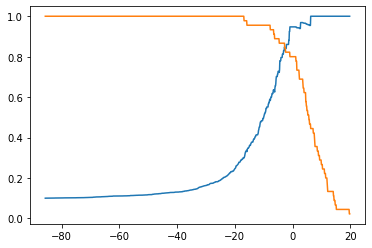

In [43]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

### 10.6.1 Precision-Recall曲线

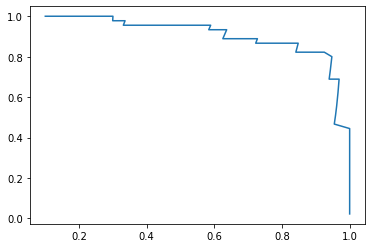

In [44]:
plt.plot(precisions, recalls)
plt.show()

### 10.6.2 scikit-learn中的Precision-Recall曲线

In [45]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)
precisions.shape

(151,)

In [46]:
recalls.shape

(151,)

In [47]:
thresholds.shape

(150,)

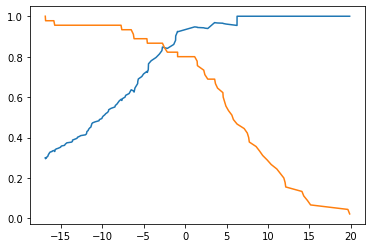

In [48]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

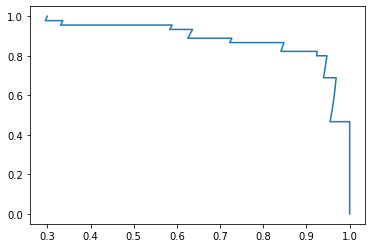

In [49]:
plt.plot(precisions, recalls)
plt.show()

## 10.7 ROC曲线
Receover Operation Characteristic Curve
### 10.7.1 概述
* 描述TPR和FPR之间的关系
![](../image/ca7-1.png)
![](../image/ca7-2.png)
### 10.7.2  示例

In [50]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [52]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/zhourao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
%run metrics.py

In [54]:
from metrics import FPR, TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

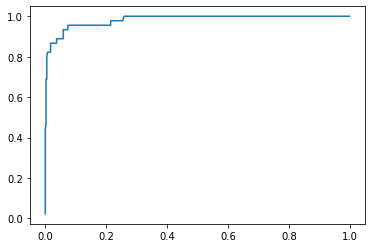

In [55]:
plt.plot(fprs, tprs)
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9823319615912208

## 10.8多分类问题中的混淆矩阵
### 10.8.1 概述



In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)

In [60]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/Users/zhourao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9408901251738526

In [61]:
y_predict = log_reg.predict(X_test)

In [62]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict, average='micro')

0.9408901251738526

In [63]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[148,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 125,   2,   0,   0,   0,   0,   3,   2,  11],
       [  0,   1, 134,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 138,   0,   5,   0,   1,   4,   0],
       [  2,   4,   0,   0, 138,   0,   1,   3,   0,   2],
       [  1,   2,   1,   0,   0, 146,   1,   0,   0,   1],
       [  0,   2,   0,   0,   0,   1, 132,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135,   0,   1],
       [  0,   8,   2,   1,   3,   3,   0,   1, 120,   2],
       [  0,   1,   0,   6,   0,   1,   0,   1,   1, 137]])

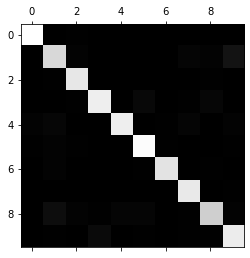

In [64]:
cfm =  confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [65]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)
err_matrix

array([[0.        , 0.        , 0.00735294, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01470588, 0.        , 0.        ,
        0.        , 0.        , 0.02205882, 0.01428571, 0.07482993],
       [0.        , 0.00699301, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.00735294, 0.        , 0.        ,
        0.03289474, 0.        , 0.00735294, 0.02857143, 0.        ],
       [0.01342282, 0.02797203, 0.        , 0.        , 0.        ,
        0.        , 0.00735294, 0.02205882, 0.        , 0.01360544],
       [0.00671141, 0.01398601, 0.00735294, 0.        , 0.        ,
        0.        , 0.00735294, 0.        , 0.        , 0.00680272],
       [0.        , 0.01398601, 0.        , 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.       

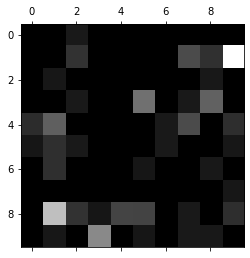

In [66]:
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()